# Train du modèle

Ici nous allons entraîner notre modèle général. Ce modèle est entrainé sur l'ensemble des voitures ou sur un sous-ensemble du jeu de donnée (filter par classes de voitures).

### Importation des bibliothèques

In [1]:
# Ajout du chemin de nos fichiers d'aides
import os
import sys

sys.path.append(os.path.abspath("../helper"))

In [2]:
from typing import Tuple
import math
import shutil

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch


In [5]:
from model import MyModel
from chargement_donnee import get_dataset_transformation, create_subset, ORIGINAL_PATH_DATASET_IMAGES, get_dataset_loader

### Choisir le 'device' pour entraînement sur gpu ou cpu

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

### Définition des hyperparamètres

In [23]:
BATCH_SIZE = 32
IMAGE_WIDTH = 512
IMAGE_HEIGHT = 512

### Définition des transformations appliquées sur les données

Les détails du code des deux prochaines sections sont dans 'helper/load_dataset.py'

In [24]:
train_tfms, test_tfms = get_dataset_transformation(IMAGE_WIDTH, IMAGE_HEIGHT)
train_tfms, test_tfms

(Compose(
     Resize(size=(512, 512), interpolation=bilinear, max_size=None, antialias=warn)
     RandomHorizontalFlip(p=0.5)
     RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
     ToTensor()
     Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
 ),
 Compose(
     Resize(size=(512, 512), interpolation=bilinear, max_size=None, antialias=warn)
     ToTensor()
     Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
 ))

### Chargement du jeu de donnée

In [27]:
use_subset = False
if use_subset:
    included_directories = ['Acura Integra Type R 2001', "Bentley Arnage Sedan 2009", "Chevrolet Camaro Convertible 2012", "Acura TSX Sedan 2012"]
    path_dataset = "dataset/car_data_sub/car_data"
    create_subset(ORIGINAL_PATH_DATASET_IMAGES, path_dataset, included_directories)
else:
    path_dataset = ORIGINAL_PATH_DATASET_IMAGES

In [28]:
nb_classes, train_loader, test_loader = get_dataset_loader(path_dataset, train_tfms, test_tfms)

Number of classes 196
Train dataset size is 8144
Test dataset size is 8041


### Chargement du modèle

Les détails du code est dans le fichier 'helper/my_model.py'

In [29]:
my_model = MyModel(nb_classes, device)

/opt/mamba/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/mamba/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### Entrainement du modèle

In [31]:
training_losses, training_accs, test_accs = my_model.train(train_loader, test_loader, nb_epochs=4)
()

100%|██████████| 255/255 [02:33<00:00,  1.66it/s]


Epoch 1, duration: 153.585111618042s, loss: 4.4132, acc: 10.0000


100%|██████████| 252/252 [00:50<00:00,  4.96it/s]


Accuracy on test dataset : 28.44


100%|██████████| 255/255 [02:33<00:00,  1.66it/s]


Epoch 2, duration: 153.17885565757751s, loss: 2.2469, acc: 47.5980


100%|██████████| 252/252 [00:51<00:00,  4.89it/s]


Accuracy on test dataset : 56.06


 27%|██▋       | 70/255 [00:42<01:53,  1.63it/s]


KeyboardInterrupt: 

### Affichage des résultats de l'entraînement

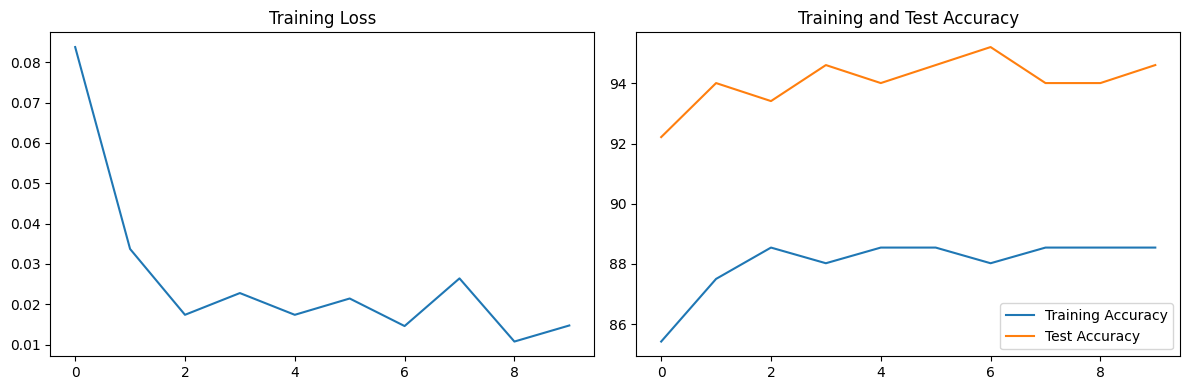

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot training loss
axs[0].plot(training_losses)
axs[0].set_title("Training Loss")

# Plot training and test accuracy
axs[1].plot(training_accs, label="Training Accuracy")
axs[1].plot(test_accs, label="Test Accuracy")
axs[1].set_title("Training and Test Accuracy")
axs[1].legend()

plt.tight_layout()
plt.show()

### Sauvegarde du modèle

In [22]:
torch.save(my_model.model.state_dict(), '../model/model_tmp.pth')